# Insurance Data Analysis Pipeline

This notebook demonstrates how to use the DataCleaner class and inline EDA functions for comprehensive data analysis.

In [1]:
import sys
import os
from pathlib import Path

# Add scripts directory to path
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

from clean_data import DataCleaner
from eda_inline import (
    show_data_summary,
    show_missing_values,
    show_descriptive_stats,
    show_distributions,
    show_outliers,
    show_correlation,
    show_scatter,
    show_group_analysis,
    show_temporal_trends,
    run_full_inline_analysis
)

import pandas as pd
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Data Cleaning

Use the DataCleaner class to load and clean the raw data.

The cleaned data will be saved in the same directory as the raw data with a _cleaned suffix.

In [2]:
# Initialize the DataCleaner
cleaner = DataCleaner()

# Process the data file
# This saves to data/MachineLearningRating_v3_cleaned.csv
df = cleaner.process_file(
    input_path="../data/MachineLearningRating_v3.txt",
    save_to_cleaned=True
)

print(f"\nCleaned data shape: {df.shape}")

✓ Loaded 1,000,098 rows from MachineLearningRating_v3.txt

=== Starting Data Cleaning ===
✓ Converted 12 columns to numeric
✓ Normalized 2 date columns to %Y-%m-%d
✓ Converted boolean columns to binary
✓ Created VehicleAge feature
✓ Imputed Gender from Title
✓ Dropped 4 columns with >80.0% missing values
✓ Imputed missing values (Cat: Unknown, Num: Median)
✓ Removed 74 duplicate rows
✓ Calculated LossRatio for 618,462 rows
=== Data Cleaning Complete ===

✓ Saved cleaned data to ..\data\MachineLearningRating_v3_cleaned.csv

Cleaned data shape: (1000024, 51)


# 3. Exploratory Data Analysis (EDA)

All EDA results will be displayed inline in this notebook. No files will be saved.

Option 1: Run Full Analysis (Automated)


COMPREHENSIVE EDA ANALYSIS
DATA STRUCTURE SUMMARY

Shape: 1,000,024 rows × 51 columns

Data Types:
object     30
Float64    12
float64     5
int64       3
int32       1
Name: count, dtype: int64

First few rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,VehicleAge,LossRatio
0,145249,12827,2015-03-01,1,Close Corporation,Mr,English,First National Bank,Current account,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,1,0,119300.0,0.0,0.0,0.0,0.0,0.0,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,11.0,0.0
1,145249,12827,2015-05-01,1,Close Corporation,Mr,English,First National Bank,Current account,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,1,0,119300.0,0.0,0.0,0.0,0.0,0.0,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0,2015,11.0,0.0
2,145249,12827,2015-07-01,1,Close Corporation,Mr,English,First National Bank,Current account,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,1,0,119300.0,0.0,0.0,0.0,0.0,0.0,0.01,Monthly,25.0,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.0,0.0,2015,11.0,<NA>
3,145255,12827,2015-05-01,1,Close Corporation,Mr,English,First National Bank,Current account,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,1,0,119300.0,0.0,0.0,0.0,0.0,0.0,119300.0,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.84807,0.0,2015,11.0,0.0
4,145255,12827,2015-07-01,1,Close Corporation,Mr,English,First National Bank,Current account,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150,Passenger Vehicle,2004.0,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,2002-06-01,119300.0,1,0,119300.0,0.0,0.0,0.0,0.0,0.0,119300.0,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.0,0.0,2015,11.0,<NA>



Memory Usage: 2139.61 MB

MISSING VALUES ASSESSMENT

Top 30 columns with missing values:


,Missing_Count,Missing_Percentage
LossRatio,381562,38.16



DESCRIPTIVE STATISTICS

Numeric Column Statistics:


,count,mean,std,min,25%,50%,75%,max,skewness
TotalPremium,1000024.0,61.910033,230.292426,-782.576754,0.0,2.178333,21.929825,65282.603421,138.592368
TotalClaims,1000024.0,64.865989,2384.162836,-12002.412281,0.0,0.0,0.0,393092.105263,69.930531
CustomValueEstimate,1000024.0,221227.951312,265059.855823,20000.0,220000.0,220000.0,220000.0,26550000.0,87.087601
SumInsured,1000024.0,604177.323761,1508336.124514,0.01,5000.0,7500.0,250000.0,12636200.0,2.548553



DISTRIBUTION PLOTS

TotalPremium:


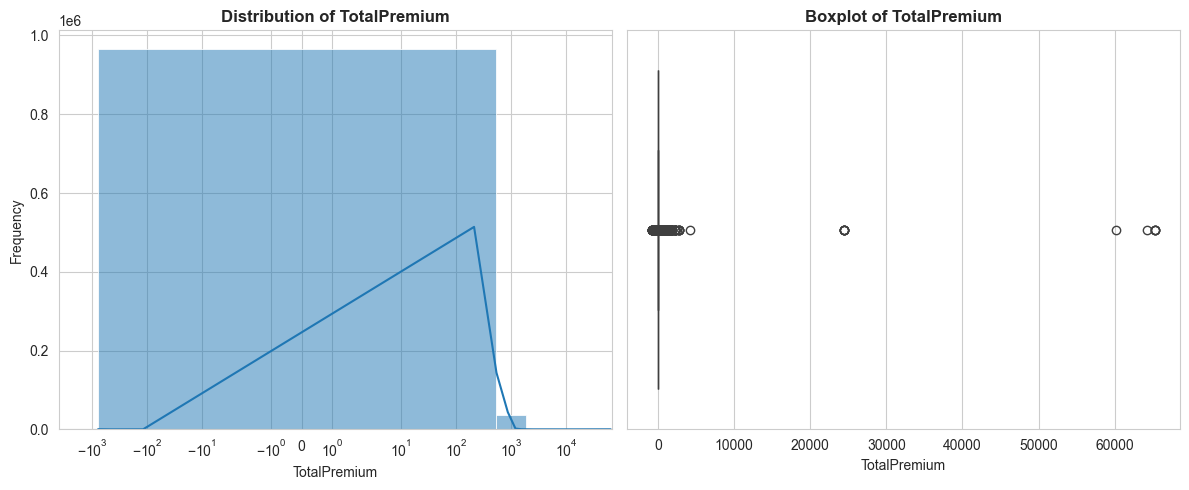


TotalClaims:


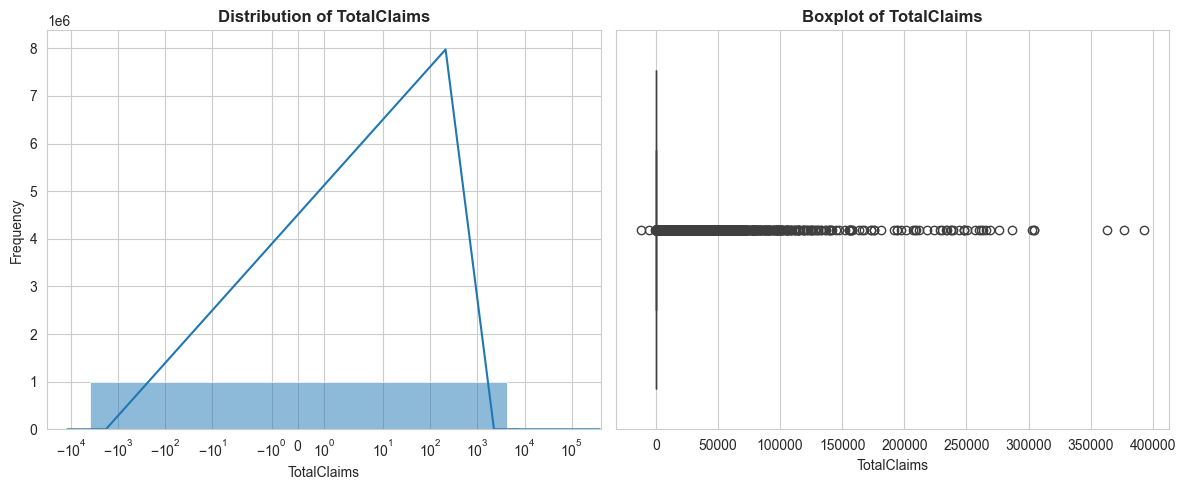


CustomValueEstimate:


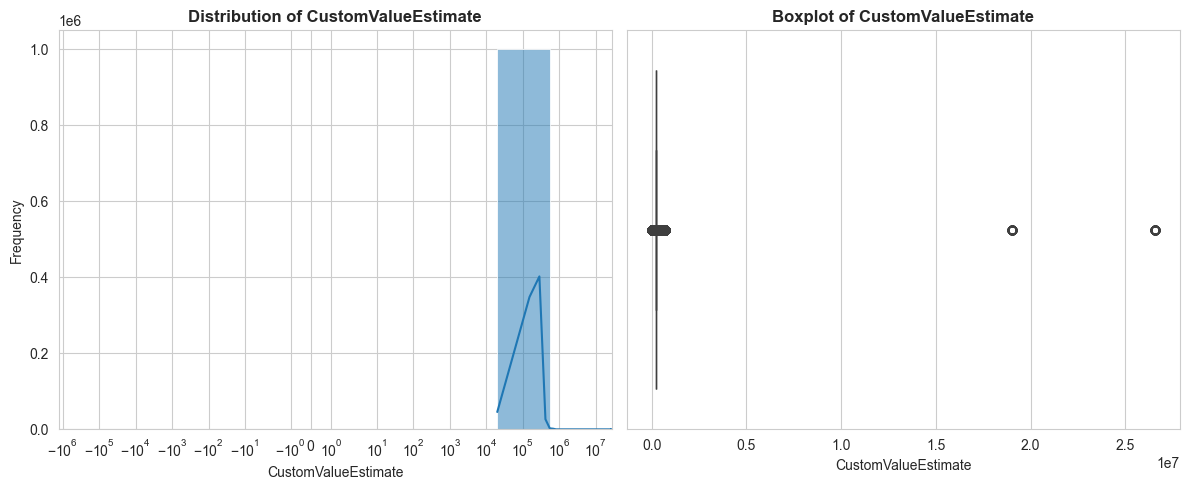


SumInsured:


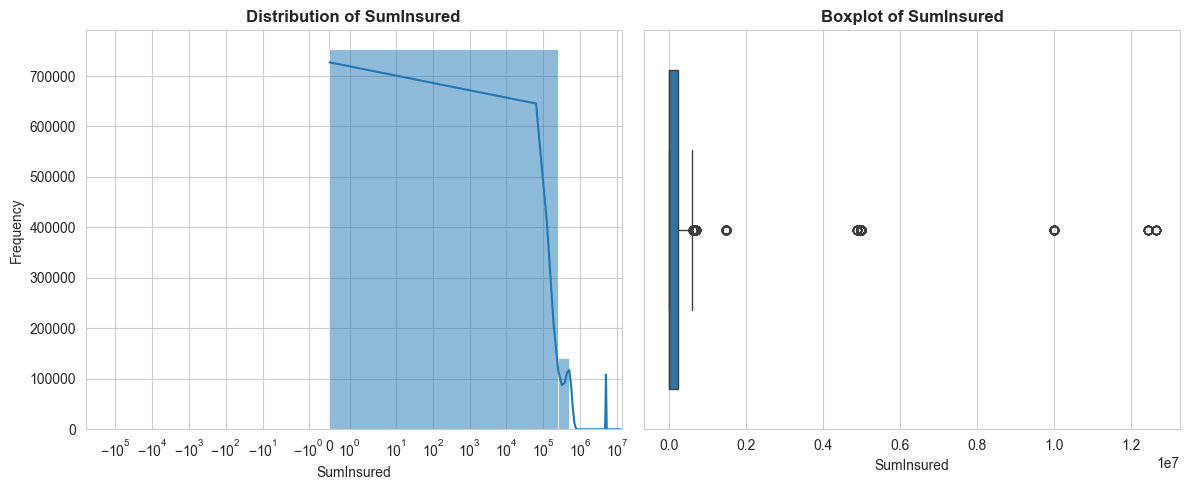


OUTLIER DETECTION

TotalPremium - Outlier Detection (IQR method):
  IQR Outliers: 209,042 (20.90%)

TotalPremium - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 12,470 (1.25%)

TotalClaims - Outlier Detection (IQR method):
  IQR Outliers: 2,793 (0.28%)

TotalClaims - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 1,312 (0.13%)

CustomValueEstimate - Outlier Detection (IQR method):
  IQR Outliers: 217,810 (21.78%)

CustomValueEstimate - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 129 (0.01%)

SumInsured - Outlier Detection (IQR method):
  IQR Outliers: 104,287 (10.43%)

SumInsured - Outlier Detection (ZSCORE method):
  Z-score Outliers (|z| > 3.0): 51 (0.01%)

CORRELATION ANALYSIS

Correlation Matrix:


,TotalPremium,TotalClaims,CustomValueEstimate,SumInsured
TotalPremium,1.000000,0.121588,0.007506,-0.041176
TotalClaims,0.121588,1.000000,0.000474,-0.005129
CustomValueEstimate,0.007506,0.000474,1.000000,-0.000088
SumInsured,-0.041176,-0.005129,-0.000088,1.000000


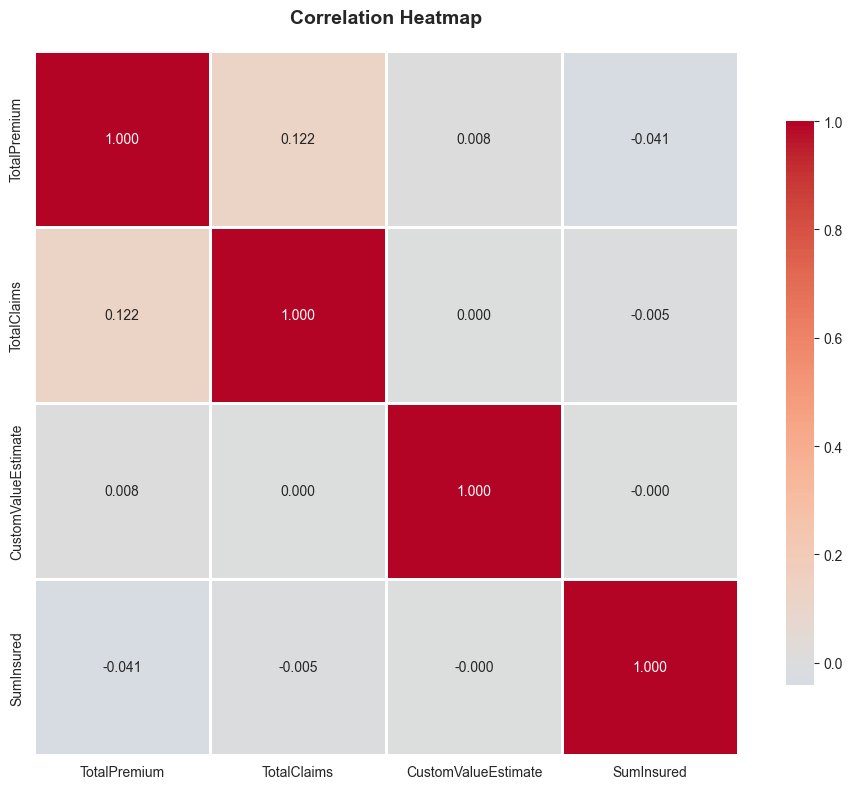


SCATTER PLOT: TotalPremium vs TotalClaims


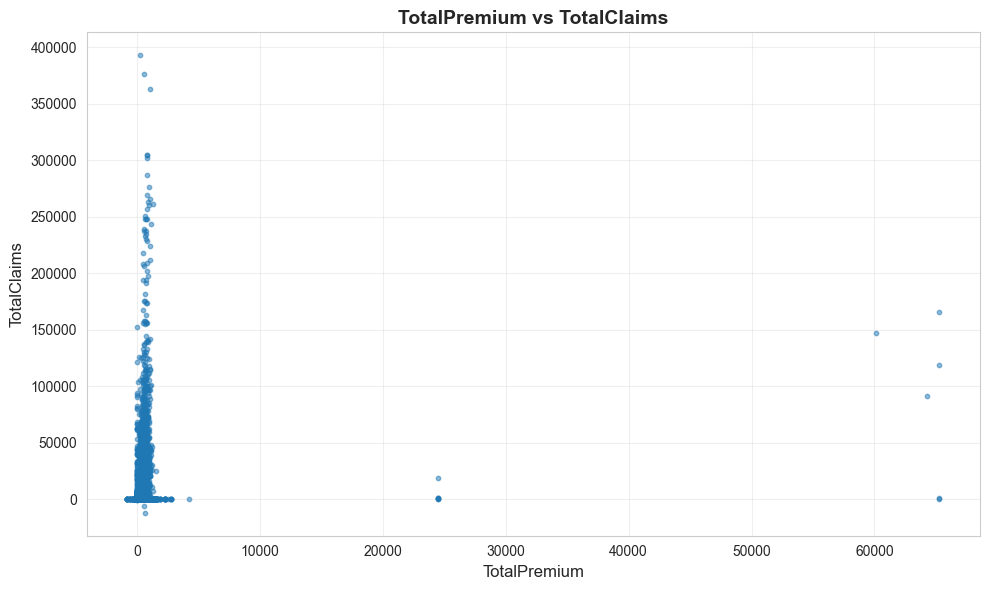


Correlation: 0.1216

GROUP-LEVEL KPI ANALYSIS

Province - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Province,,,,
Gauteng,393861,24053731.006006,29394148.476842,1.22202
Kwazulu-Natal,169781,13209079.812203,14301382.449298,1.082693
Western Cape,170726,9806558.528868,10389773.736491,1.059472
North West,143287,7490508.178516,5920249.995088,0.790367
Mpumalanga,52718,2836291.942653,2044675.357895,0.720897
Free State,8099,521363.244991,354922.27193,0.680758
Limpopo,24836,1537324.499402,1016476.710526,0.661199
Eastern Cape,30336,2140103.833435,1356426.66386,0.633813
Northern Cape,6380,316558.073674,89490.508772,0.282699



VehicleType - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
VehicleType,,,,
Heavy Commercial,7401,460947.862946,750474.583333,1.628112
Medium Commercial,53985,3922745.552383,4119866.901579,1.050251
Passenger Vehicle,933524,56641973.008237,59372069.675789,1.048199
Unknown,552,567110.436101,556685.974912,0.981618
Light Commercial,3897,260497.520424,60452.5,0.232066
Bus,665,58244.739658,7996.535088,0.137292



⚠ Skipping Gender - column not found

TEMPORAL TREND ANALYSIS

Monthly Trends:


,policies,total_premium,total_claims,loss_ratio
TransactionMonth,,,,
2013-10-01,45,371.063512,0.0,0.0
2013-11-01,1196,21307.467009,50585.078947,2.374054
2013-12-01,1495,42484.748888,9283.385965,0.218511
2014-01-01,1827,54085.196865,12436.859649,0.229949
2014-02-01,2062,60788.43647,62989.307018,1.036205
2014-03-01,3466,98577.193147,322785.021579,3.274439
2014-04-01,6919,234274.337556,306863.592105,1.309847
2014-05-01,9484,375911.724808,518042.736667,1.378097
2014-06-01,11822,486219.395357,504536.396491,1.037672


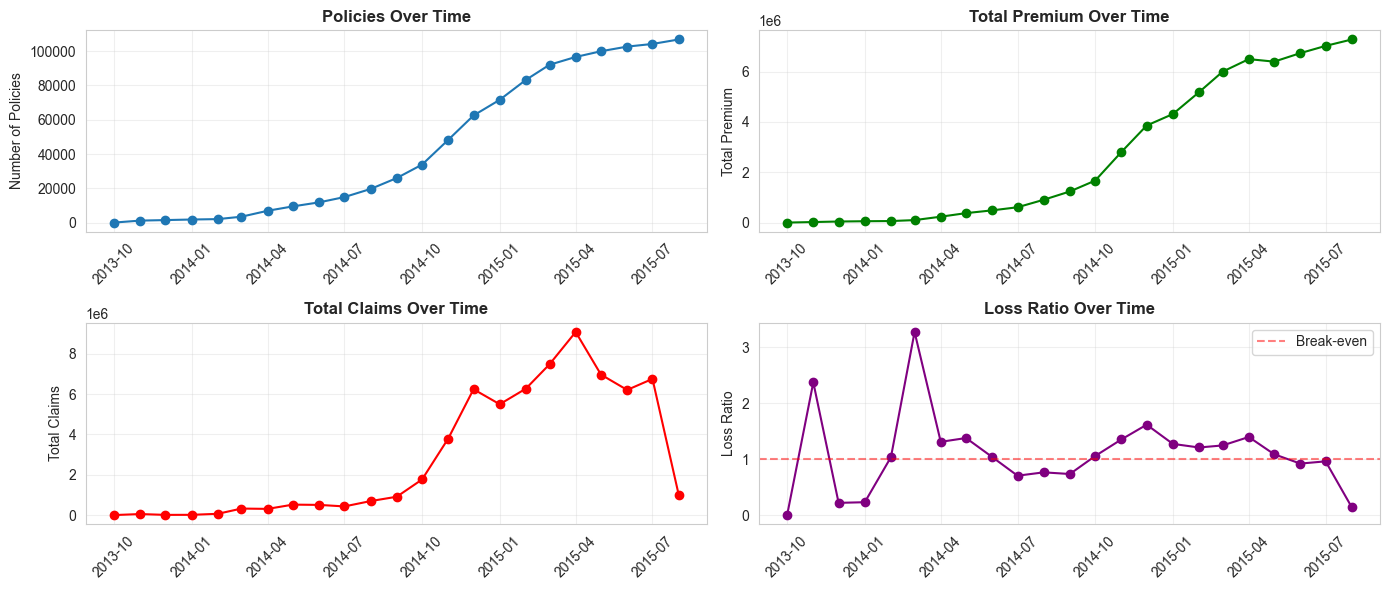


ANALYSIS COMPLETE


In [3]:
# Run complete EDA pipeline 
run_full_inline_analysis(df)

## Group-Level KPI Analysis

In [4]:
# Analyze KPIs by different groups
show_group_analysis(df, group_cols=['Province', 'VehicleType', 'Gender'])


GROUP-LEVEL KPI ANALYSIS

Province - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
Province,,,,
Gauteng,393861,24053731.006006,29394148.476842,1.22202
Kwazulu-Natal,169781,13209079.812203,14301382.449298,1.082693
Western Cape,170726,9806558.528868,10389773.736491,1.059472
North West,143287,7490508.178516,5920249.995088,0.790367
Mpumalanga,52718,2836291.942653,2044675.357895,0.720897
Free State,8099,521363.244991,354922.27193,0.680758
Limpopo,24836,1537324.499402,1016476.710526,0.661199
Eastern Cape,30336,2140103.833435,1356426.66386,0.633813
Northern Cape,6380,316558.073674,89490.508772,0.282699



VehicleType - Top 10 by Loss Ratio:


,policies,total_premium,total_claims,loss_ratio
VehicleType,,,,
Heavy Commercial,7401,460947.862946,750474.583333,1.628112
Medium Commercial,53985,3922745.552383,4119866.901579,1.050251
Passenger Vehicle,933524,56641973.008237,59372069.675789,1.048199
Unknown,552,567110.436101,556685.974912,0.981618
Light Commercial,3897,260497.520424,60452.5,0.232066
Bus,665,58244.739658,7996.535088,0.137292



⚠ Skipping Gender - column not found


## Temporal Trend Analysis


TEMPORAL TREND ANALYSIS

Monthly Trends:


,policies,total_premium,total_claims,loss_ratio
TransactionMonth,,,,
2013-10-01,45,371.063512,0.0,0.0
2013-11-01,1196,21307.467009,50585.078947,2.374054
2013-12-01,1495,42484.748888,9283.385965,0.218511
2014-01-01,1827,54085.196865,12436.859649,0.229949
2014-02-01,2062,60788.43647,62989.307018,1.036205
2014-03-01,3466,98577.193147,322785.021579,3.274439
2014-04-01,6919,234274.337556,306863.592105,1.309847
2014-05-01,9484,375911.724808,518042.736667,1.378097
2014-06-01,11822,486219.395357,504536.396491,1.037672


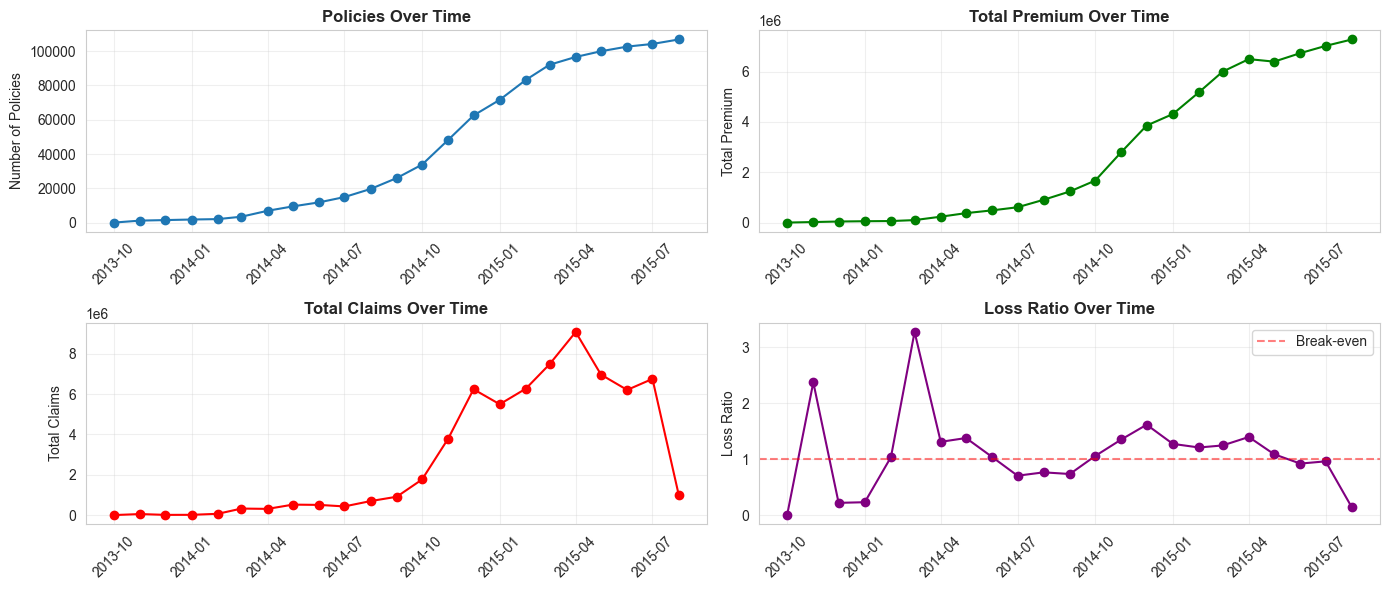

In [5]:
# Analyze trends over time
temporal_df = show_temporal_trends(df, date_col='TransactionMonth')

## Summary
### This notebook demonstrated:

Data Cleaning: Using DataCleaner to process and save cleaned data
Analusis: Using analysis functions to display analysis results directly in the notebook
The cleaned data is saved to: data/MachineLearningRating_v3_cleaned.csv